In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
# %matplotlib inline

## TODO: Test $2^{2^{\mathcal G(1/2)}}$

In [34]:
def run_expe(p_success=.5, maxgain=np.inf):
    gain = 1
    while np.random.rand() < p_success and gain < maxgain:
        gain *= 2            
    return gain

In [3]:
%%time
nb_rep = int(1e7)
gains = np.empty(nb_rep)

for rep in range(nb_rep):
    gains[rep] = run_expe()
print(gains.mean())

11.0536659
CPU times: total: 10.5 s
Wall time: 10.6 s


In [27]:
def run_stpeter(size, p_success=.5, maxgain=np.inf):
    gains = 2**(np.random.geometric(p_success, size=size)-1)
    gains = np.minimum(gains, maxgain)
    return gains

In [28]:
%%time
nb_trial = int(1e7)
gains = run_stpeter(nb_trial)

print(gains.mean())

11.9397287
CPU times: total: 391 ms
Wall time: 344 ms


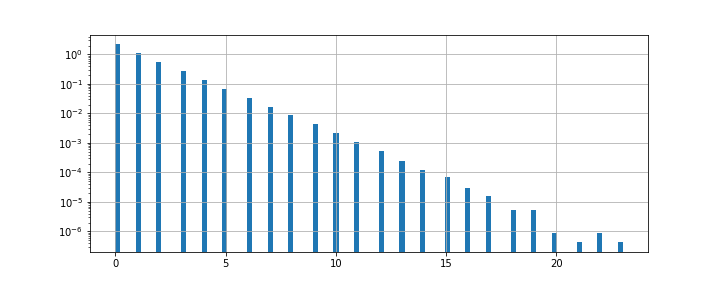

In [29]:
plt.figure(figsize=(10,4))
plt.hist(np.log2(gains), 100, density=True, log=True)
plt.grid();

In [7]:
%%time
nb_rep1 = int(1e5)
nb_rep2 = int(1e2)
nb_trials = np.arange(1, 101, 10)
max_trial = nb_trials[-1]
gain_meds, gain_means = np.zeros((nb_rep2, len(nb_trials))), np.zeros((nb_rep2, len(nb_trials)))

for rep2 in range(nb_rep2):
    if rep2%(nb_rep2//10)==0: print(f"{rep2}/{nb_rep2}")
    gains = run_stpeter(size=(nb_rep1, max_trial))
    for i, nb_trial in enumerate(nb_trials):
        gain_cummean = np.mean(gains[:,:nb_trial], axis=-1)
        # print(gains[:,:nb_trial].shape)
        gain_meds[rep2, i] = np.median(gain_cummean, axis=0)
        gain_means[rep2, i] = np.mean(gain_cummean, axis=0)


0/100
10/100
20/100
30/100
40/100
50/100
60/100
70/100
80/100
90/100
CPU times: total: 35 s
Wall time: 35.1 s


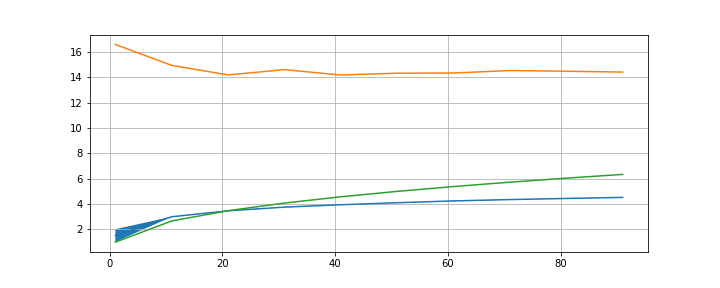

In [33]:
plt.figure(figsize=(10,4))
plt.plot(nb_trials, gain_meds.mean(0))
plt.fill_between(nb_trials, gain_meds.mean(0)-gain_meds.std(0), gain_meds.mean(0)+gain_meds.std(0))
plt.plot(nb_trials, gain_means.mean(0))
plt.plot(nb_trials, nb_trials**(1/(1+1/np.log(2))) )
plt.grid();

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(nb_trials, gain_meds.mean(0))
plt.fill_between(nb_trials, gain_meds.mean(0)-gain_meds.std(0), gain_meds.mean(0)+gain_meds.std(0))
plt.plot(nb_trials, gain_means.mean(0))
plt.plot(nb_trials, nb_trials**(1/(1+1/np.log(2))) )
plt.grid();

In [2]:
def nb_sous_mots(l, L):
    """Compte le nombre de façons différents dont
    le mot l peut apparaître comme sous-mot du mot L."""
    if L == "":
        return int(l == "")
    if l == "":
        return 1
    if L[0] != l[0]:
        return nb_sous_mots(l, L[1:])
    # Ici, nous savons que L est non vide et que
    # l[0] est L[0]. On a donc deux choix possibles.
    return nb_sous_mots(l[1:], L[1:]) + nb_sous_mots(l, L[1:])


l = 'aba'
L = 'ababab'
print(nb_sous_mots(l, L))

# Comptons à la main :
# aba---
# ab--a-
# a--ba-
# --aba-

4


In [ ]:
def nb_sous_mots(l, L):
    